## 09. 히스토그램, 팽창과 침식

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

PEACH_PATH = "../images/peach.jpg"
DILATE = "../images/dilate.jpg"
ERODE = "../images/erode.jpg"

### 9-1. 히스토그램

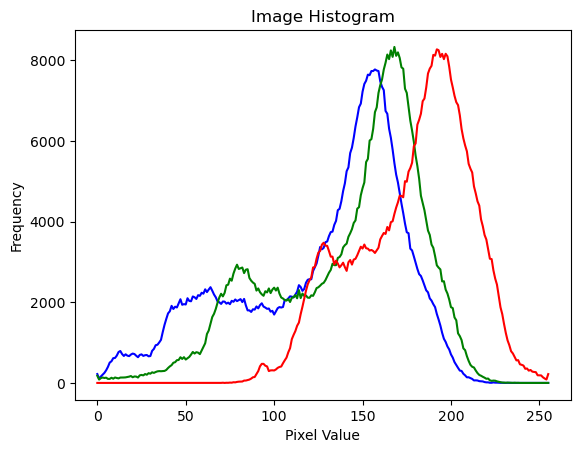

In [2]:
img = cv.imread(PEACH_PATH)

b = cv.calcHist([img], [0], None, [256], [0, 256])
g = cv.calcHist([img], [1], None, [256], [0, 256])
r = cv.calcHist([img], [2], None, [256], [0, 256])

plt.plot(b, color="b")
plt.plot(g, color="g")
plt.plot(r, color="r")
plt.title("Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

### 9-2. 팽창과 침식, 열림과 닫힘

#### 팽창
- 흰색 영역을 확장하여 검은 영역을 채움

In [7]:
img = cv.imread(DILATE)

kernel = np.ones((3,3), dtype=np.uint8)
dilate_1 = cv.dilate(img, kernel, iterations=1)
dilate_2 = cv.dilate(img, kernel, iterations=2)
dilate_3 = cv.dilate(img, kernel, iterations=3)

cv.imshow("img", img)
cv.imshow("dilate_1", dilate_1)
cv.imshow("dilate_2", dilate_2)
cv.imshow("dilate_3", dilate_3)

cv.waitKey(0)
cv.destroyAllWindows()

# 폰트가 점점 두꺼워짐

#### 침식
- 흰색 영역의 외곽 픽셀을 검은색으로 변경

In [9]:
img = cv.imread(ERODE)

kernel = np.ones((3,3), dtype=np.uint8)
erode_1 = cv.erode(img, kernel, iterations=1)
erode_2 = cv.erode(img, kernel, iterations=2)
erode_3 = cv.erode(img, kernel, iterations=3)

cv.imshow("img", img)
cv.imshow("erode_1", erode_1)
cv.imshow("erode_2", erode_2)
cv.imshow("erode_3", erode_3)

cv.waitKey(0)
cv.destroyAllWindows()

# 폰트가 점점 얇아짐

#### 열림
- 침식 후 팽창 (침식할 때 깎인 폰트를 다시 팽창해서 원래 폰트로) : 노이즈 제거 후 복원

In [10]:
img = cv.imread(ERODE)

kernel = np.ones((3,3), dtype=np.uint8)
erode_3 = cv.erode(img, kernel, iterations=3)
dilate_3 = cv.dilate(erode_3, kernel, iterations=3)


cv.imshow("img", img)
cv.imshow("erode_3", erode_3)
cv.imshow("open", dilate_3)

cv.waitKey(0)
cv.destroyAllWindows()

#### 닫힘
- 팽창 후 침식 : 구멍을 메운 후 복원

In [11]:
img = cv.imread(ERODE)

kernel = np.ones((3,3), dtype=np.uint8)
dilate_3 = cv.dilate(img, kernel, iterations=3)
erode_3 = cv.erode(dilate_3, kernel, iterations=3)

cv.imshow("img", img)
cv.imshow("dilate_3", dilate_3)
cv.imshow("close", erode_3)

cv.waitKey(0)
cv.destroyAllWindows()